## Imports

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt
from utils import assign_edge_colors
import dataframe_image as dfi

### Visualization Settings

In [3]:
# Color Settings
BG_COLOR = (0,0,0)
NODE_COLOR = "w"
EDGE_COLORS = ["g", "b", "r","c"]

# Size
NODE_SIZE= 15
EDGE_LW = 3
 

## Create Graphs

In [4]:
graph = ox.graph_from_place({"state": "California", "city": "San Francisco"}, simplify=False, network_type="drive")
simplified_graph = ox.simplification.simplify_graph(graph)

### Visualization of SF before and after simplification

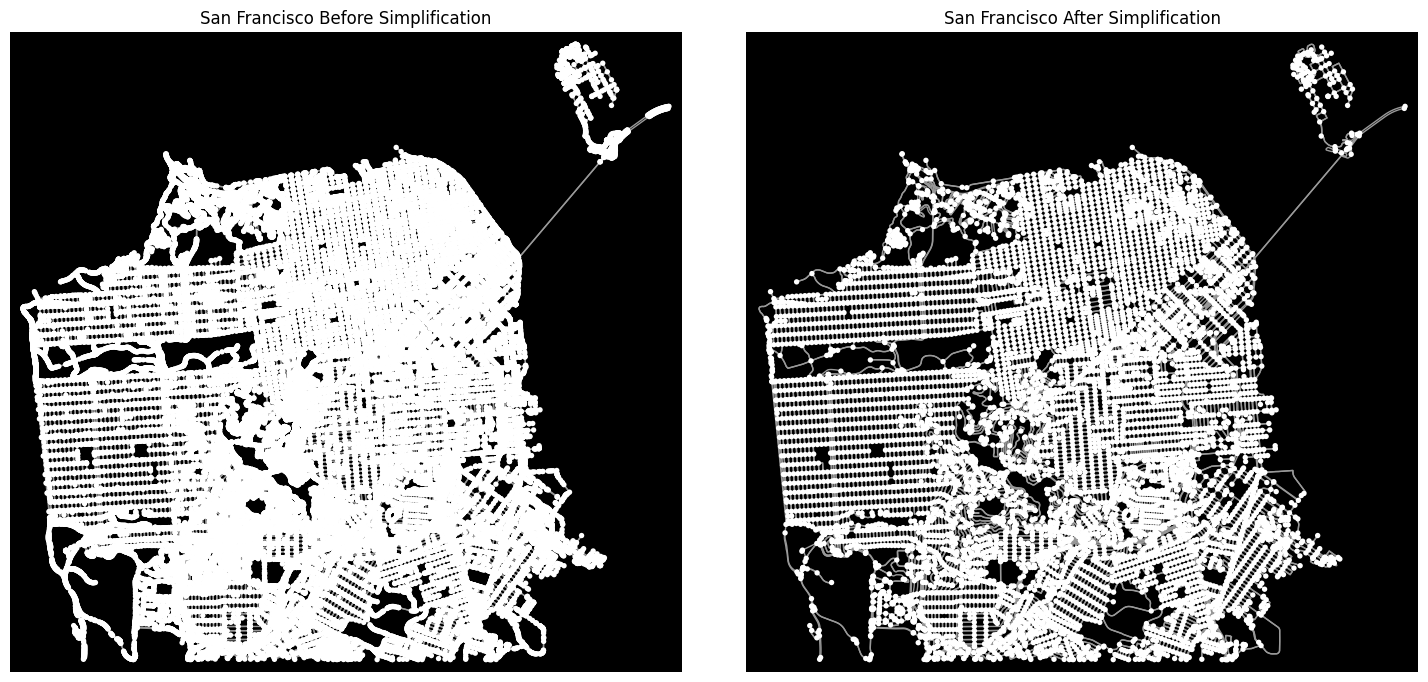

In [5]:
fig, axes = plt.subplots(figsize=(15,7), ncols=2, frameon=False)

for ax in axes:
    ax.set_facecolor(BG_COLOR)
    
fig, axes[0] = ox.plot_graph(graph, ax=axes[0], close=False, show=False) 
fig, axes[1] = ox.plot_graph(simplified_graph, ax=axes[1], close=False, show=False)

axes[0].set_title("San Francisco Before Simplification")
axes[1].set_title("San Francisco After Simplification")
fig.tight_layout(pad=2)
plt.savefig("outputs//sf_before_after.png", dpi=300)

## Feature Analysis

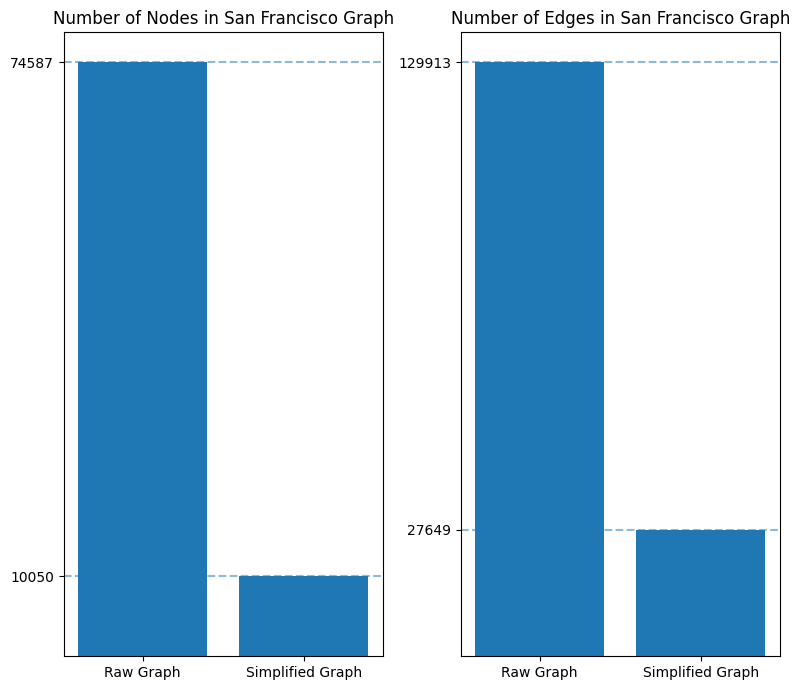

In [6]:
fig, axes = plt.subplots(figsize=(8,7), ncols=2)

# Number of Nodes
axes[0].bar([0,1], [len(graph), len(simplified_graph)])
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(["Raw Graph", "Simplified Graph"])
axes[0].set_title("Number of Nodes in San Francisco Graph")
axes[0].set_yticks([len(graph), len(simplified_graph)])
axes[0].axhline(len(graph), ls="--", alpha=0.5)
axes[0].axhline(len(simplified_graph), ls="--", alpha=0.5)


# Number of Edges
axes[1].bar([0,1], [len(graph.edges()), len(simplified_graph.edges())])
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(["Raw Graph", "Simplified Graph"])
axes[1].set_title("Number of Edges in San Francisco Graph")
axes[1].set_yticks([len(graph.edges()), len(simplified_graph.edges())])
axes[1].axhline(len(graph.edges()), ls="--", alpha=0.5)
axes[1].axhline(len(simplified_graph.edges()), ls="--", alpha=0.5)
fig.tight_layout()
plt.savefig("outputs//nodes_edges.png", dpi=200)



### Length Distribution

In [7]:
graph_edge_lengths = [graph.edges[*edge,0]["length"] for edge in graph.edges()]
len(graph_edge_lengths)

129913

In [8]:
simplified_graph_edge_lengths = [simplified_graph.edges[*edge,0]["length"] for edge in simplified_graph.edges()]
len(simplified_graph_edge_lengths)

27649

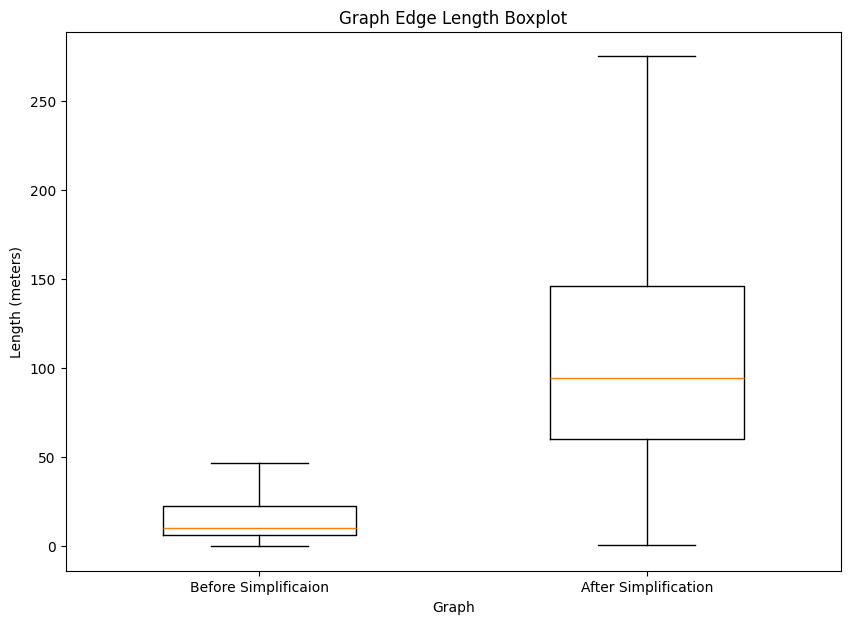

In [9]:
fig, ax = plt.subplots(figsize=(10,7))

ax.boxplot(graph_edge_lengths, positions= [0], showfliers=False,widths=0.5)
ax.boxplot(simplified_graph_edge_lengths, positions= [1], showfliers=False,widths=0.5)

ax.set_xlabel("Graph")
ax.set_ylabel("Length (meters)")
ax.set_xticks([0,1])
ax.set_xticklabels(["Before Simplificaion", "After Simplification"])
ax.set_title("Graph Edge Length Boxplot")
fig.savefig("outputs//sf_box.png")

## Zoomed Graph

In [10]:
lat1, lon1 = 37.806054397786056, -122.44293466180456
lat2, lon2 = 37.80021716104004, -122.4356708469928

zoomed_nodes_graph = [node for node in graph.nodes() if graph.nodes[node]["y"] < lat1 and graph.nodes[node]["y"] > lat2 and graph.nodes[node]["x"] < lon2 and graph.nodes[node]["x"] > lon1 ]
zoomed_nodes_simplified_graph = [node for node in simplified_graph.nodes() if simplified_graph.nodes[node]["y"] < lat1 and simplified_graph.nodes[node]["y"] > lat2 and simplified_graph.nodes[node]["x"] < lon2 and simplified_graph.nodes[node]["x"] > lon1 ]

zoomed_graph = graph.subgraph(zoomed_nodes_graph)
zoomed_simplified_graph = simplified_graph.subgraph(zoomed_nodes_simplified_graph)


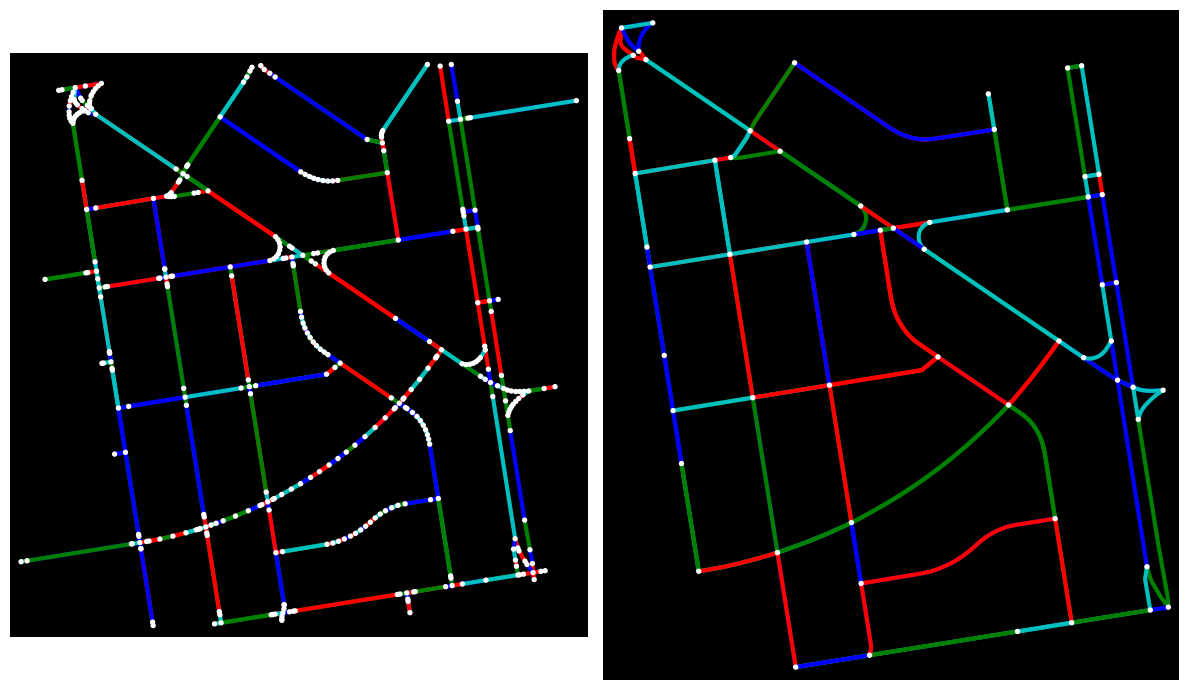

In [11]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7), frameon=False)

for ax in axes:
    ax.set_facecolor(BG_COLOR)

graph_edge_colors = assign_edge_colors(zoomed_graph, EDGE_COLORS)
simplified_graph_edge_colors = assign_edge_colors(zoomed_simplified_graph, EDGE_COLORS)

fig, axes[0] = ox.plot_graph(zoomed_graph, ax=axes[0], edge_color=graph_edge_colors, node_color=NODE_COLOR, node_size=NODE_SIZE, edge_linewidth=EDGE_LW, close=False, show=False) 
fig, axes[1] = ox.plot_graph(zoomed_simplified_graph, ax=axes[1], edge_color=simplified_graph_edge_colors, node_color=NODE_COLOR, node_size=NODE_SIZE, edge_linewidth=EDGE_LW, close=False, show=False)

plt.tight_layout()
plt.savefig("outputs//before_after_sf.png", dpi=300)
plt.show() 

## Geo Dataframe

In [12]:
node_gdf, edge_gdf = ox.graph_to_gdfs(simplified_graph)

In [13]:
edge_gdf.head()

osmid  \
u        v          key                                                      
32927563 4377020523 0    [661905446, 50691047, 52721870, 52527662, 5069...   
32927591 315706881  0                                             28715659   
         6469349533 0                                            689603997   
32927645 65331336   0                        [28846637, 8918870, 61424023]   
         766946830  0    [8915137, 33645923, 33645968, 28656664, 61424026]   

                               highway lanes          maxspeed  \
u        v          key                                          
32927563 4377020523 0         motorway     5  [50 mph, 40 mph]   
32927591 315706881  0    motorway_link     1               NaN   
         6469349533 0         motorway     4            65 mph   
32927645 65331336   0         motorway     2            65 mph   
         766946830  0    motorway_link     2            50 mph   

                                                       name  oneway    ref  \
u        v          key                                                      
32927563 4377020523 0    San Francisco – Oakland Bay Bridge    True   I 80   
32927591 315706881  0                                   NaN    True    NaN   
         6469349533 0                  John F Foran Freeway    True  I 280   
32927645 65331336   0          Southern Embarcadero Freeway    True  I 280   
         766946830  0                                   NaN    True    NaN   

                        reversed       length bridge tunnel  \
u        v          key                                       
32927563 4377020523 0      False  3562.367768    yes    yes   
32927591 315706881  0      False   293.539869    NaN    NaN   
         6469349533 0      False   754.591926    NaN    NaN   
32927645 65331336   0      False  1196.664356    yes    NaN   
         766946830  0      False  1176.489348    yes    NaN   

                                                                  geometry  \
u        v          key                                                      
32927563 4377020523 0    LINESTRING (-122.3909 37.78602, -122.39069 37....   
32927591 315706881  0    LINESTRING (-122.42367 37.73137, -122.42318 37...   
         6469349533 0    LINESTRING (-122.42367 37.73137, -122.42357 37...   
32927645 65331336   0    LINESTRING (-122.41326 37.73271, -122.41224 37...   
         766946830  0    LINESTRING (-122.41326 37.73271, -122.41217 37...   

                        width access junction  
u        v          key                        
32927563 4377020523 0     NaN    NaN      NaN  
32927591 315706881  0     NaN    NaN      NaN  
         6469349533 0     NaN    NaN      NaN  
32927645 65331336   0     NaN    NaN      NaN  
         766946830  0     NaN    NaN      NaN

In [14]:
dfi.export(edge_gdf.head().drop("geometry", axis=1).style.background_gradient(), "outputs//edge_df.png", table_conversion="matplotlib")

In [15]:
selected_df = edge_gdf[(edge_gdf["highway"].apply(type) == list) & (edge_gdf["maxspeed"].apply(type) == list)]
selected_df

,,,osmid,highway,lanes,maxspeed,name,oneway,ref,reversed,length,bridge,tunnel,geometry,width,access,junction
u,v,key,,,,,,,,,,,,,,,
65321542,263133817,0,"[970235557, 916495048, 917310153, 8917611, 620...","[unclassified, tertiary]",2,"[20 mph, 30 mph]","[Twin Peaks Boulevard, Christmas Tree Point Road]",False,NaN,False,1655.786689,NaN,NaN,"LINESTRING (-122.44908 37.7471, -122.449 37.74...",NaN,NaN,NaN
263133817,65321542,0,"[970235557, 916495048, 917310153, 8917611, 620...","[unclassified, tertiary]",2,"[20 mph, 30 mph]","[Twin Peaks Boulevard, Christmas Tree Point Road]",False,NaN,True,1655.786689,NaN,NaN,"LINESTRING (-122.44724 37.7541, -122.44725 37....",NaN,NaN,NaN


In [16]:
dfi.export(selected_df.drop("geometry", axis=1).style.background_gradient(), "outputs//selected_edge_df.png", table_conversion="matplotlib")

## Use edge_attrs_differ attribute

In [17]:
simplified_graph_maxspeed = ox.simplify_graph(graph, edge_attrs_differ=["maxspeed"])

In [18]:
_, simplified_gdf_maxspeed_edges = ox.graph_to_gdfs(simplified_graph_maxspeed)

In [19]:
simplified_gdf_maxspeed_edges["maxspeed"].unique()

array(['50 mph', nan, '65 mph', '30 mph', '25 mph', '40 mph', '35 mph',
       '20 mph', '45 mph', '15 mph', '55 mph', '10 mph', '5 mph'],
      dtype=object)